<a href="https://colab.research.google.com/github/saraMuay/Churned_Customer_Project/blob/main/img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import face_recognition
import dlib
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import model_from_json

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/gdrive/MyDrive/antispoofing.zip')
archive.extractall('/content')

In [ ]:
json_file = open("/content/antispoofing/model/finalyearproject_antispoofing_model_mobilenet.json",'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('/content/antispoofing/model/┘Çantispoofing_model.h5')

In [3]:
!git clone https://github.com/nicolasmetallo/eameo-faceswap-generator

Cloning into 'eameo-faceswap-generator'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (16/16), done.
remote: Total 266 (delta 15), reused 15 (delta 15), pack-reused 250
Receiving objects: 100% (266/266), 168.59 MiB | 30.83 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [40]:
# face_recognition+ liveliness
face_locations = []

img = cv2.imread('/content/Rosny_Desroches_0001.jpg')
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
face_locations = face_recognition.face_locations(rgb_img)

#for (x,y,w,h) in face_locations:
for face in face_locations:
  face = img[y-5:y+h+5,x-5:x+w+5]
  resized_face = cv2.resize(face,(160,160))
  resized_face = resized_face.astype("float") / 255.0
  resized_face = np.expand_dims(resized_face, axis=0)


  preds = model.predict(resized_face)[0]
  print(preds)
  if preds> 0.5:
    label = 'Spoof'
    cv2.putText(img, label, (x,y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)
    cv2.rectangle(img, (x, y), (x+w,y+h),(0, 0, 255), 2)
  
  else:
    label = 'Real'
    cv2.putText(img, label, (x,y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    cv2.rectangle(img, (x, y), (x+w,y+h),(0, 255, 0), 2)
        
  print("Object found. Saving locally.")
  print(label)
  cv2.imwrite(str(w) + str(h) +label+ '_faces.jpg', img)
        
  cv2_imshow(img) 

  key = cv2.waitKey(1)
  if key == ord('q'):
    break


NameError: ignored

In [11]:
import os 
save_path = os.mkdir('/content/img_faces')

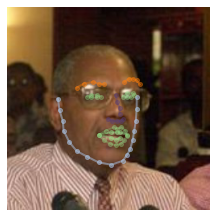

In [28]:
# face alignment
import face_alignment
import matplotlib.pyplot as plt
from skimage import io
import collections

face_detector = 'sfd'
face_detector_kwargs = {"filter_threshold" : 0.8}

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True,
                                  face_detector=face_detector, face_detector_kwargs=face_detector_kwargs)

try:
    input_img = io.imread('/content/Rosny_Desroches_0001.jpg')
except FileNotFoundError:
    input_img = io.imread('/content/Rosny_Desroches_0001.jpg')

preds = fa.get_landmarks(input_img)[-1]

# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color, **plot_style)

ax.axis('off')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

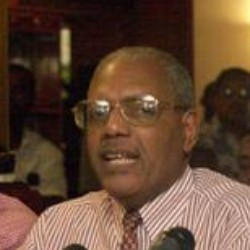

In [55]:

detector = dlib.get_frontal_face_detector()


img= cv2.imread('/content/Rosny_Desroches_0001.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces,_,_ = detector.run(image = gray_img, upsample_num_times = 0, 
                       adjust_threshold = 0.0)

predictor = dlib.shape_predictor("/content/eameo-faceswap-generator/shape_predictor_68_face_landmarks.dat")
dim=(160,160)
for face in faces:
  landmarks = predictor(img, face)
        
  cv2_imshow(img)
  



